In [2]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
image_w = 128
image_h = 128

X = []
y = []

In [11]:
categories

['갈치구이',
 '감자채볶음',
 '계란찜',
 '고사리나물',
 '메추리알장조림',
 '소세지볶음',
 '애호박볶음',
 '연근조림',
 '제육볶음',
 '콩자반']

In [1]:
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
#np_load_old = np.load
#np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
#np.load = np_load_old

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-10.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(4013, 128, 128, 3)
4013


In [2]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [6]:
from keras.callbacks import TensorBoard
from time import time 
from keras.layers import BatchNormalization 
from keras.models import Sequential
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    tensorboard = TensorBoard(log_dir="my_log_dir")
    model_path = model_dir + '/food-tensorborad.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 65536)            

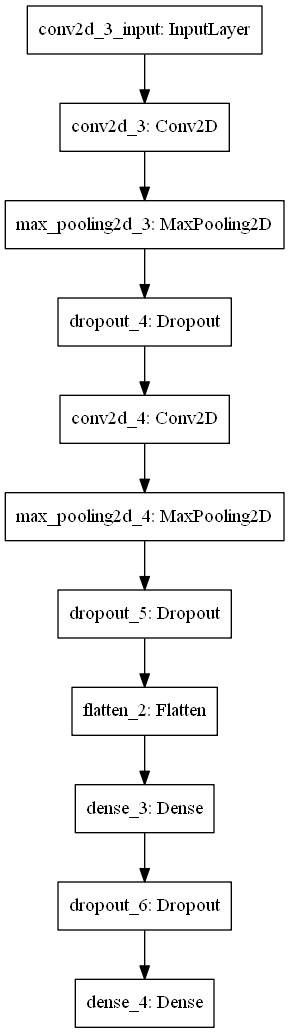

In [8]:
import keras
keras.utils.plot_model(model)

In [7]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping ])

Train on 4013 samples, validate on 1338 samples
Epoch 1/50
4013/4013 [==============================] - 11s 3ms/step - loss: 2.3955 - accuracy: 0.2437 - val_loss: 1.5037 - val_accuracy: 0.4701

Epoch 00001: val_loss improved from inf to 1.50374, saving model to ./test/food-tensorborad.model
Epoch 2/50
4013/4013 [==============================] - 11s 3ms/step - loss: 1.2985 - accuracy: 0.4984 - val_loss: 1.1352 - val_accuracy: 0.5964

Epoch 00002: val_loss improved from 1.50374 to 1.13519, saving model to ./test/food-tensorborad.model
Epoch 3/50
4013/4013 [==============================] - 11s 3ms/step - loss: 1.0726 - accuracy: 0.5971 - val_loss: 0.9653 - val_accuracy: 0.6315

Epoch 00003: val_loss improved from 1.13519 to 0.96527, saving model to ./test/food-tensorborad.model
Epoch 4/50
4013/4013 [==============================] - 11s 3ms/step - loss: 0.9197 - accuracy: 0.6591 - val_loss: 0.9323 - val_accuracy: 0.6510

Epoch 00004: val_loss improved from 0.96527 to 0.93234, saving mod

In [7]:
print("test : 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))
print("train : 정확도 : %.4f" % (model.evaluate(X_train, y_train)[1]))


1338/1338 [==============================] - 1s 716us/step
test : 정확도 : 0.7182
4013/4013 [==============================] - 3s 684us/step
train : 정확도 : 0.9230


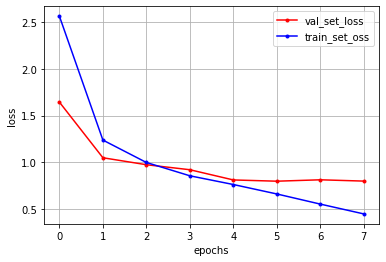

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [4]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
print(categories)
image_w = 128
image_h = 128


X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./test/food-1-1.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
  

['캡처1.PNG', '캡처10.PNG', '캡처11.PNG', '캡처12.PNG', '캡처2.PNG', '캡처4.PNG', '캡처5.PNG', '캡처8.PNG', '캡처9.PNG']
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
7
해당 이미지는 오징어채볶음로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
3
해당 이미지는 메추리알장조림로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
2
해당 이미지는 고사리나물로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
7
해당 이미지는 오징어채볶음로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
2
해당 이미지는 고사리나물로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
5
해당 이미지는 애호박볶음로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
5
해당 이미지는 애호박볶음로 추정됩니다.


In [ ]:
#----추가 

In [1]:
# ----------------------------------------------------------
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-10.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

Using TensorFlow backend.


(4013, 128, 128, 3)
4013


In [7]:
from keras.callbacks import TensorBoard
import keras
from keras.layers import ELU
from keras.layers import BatchNormalization , LeakyReLU
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal')) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    tensorboard = TensorBoard(log_dir="my_log_dir/two")
    model_path = model_dir + '/food-10.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

NameError: name 'K' is not defined

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)       

In [4]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4013 samples, validate on 1338 samples
Epoch 1/50




4013/4013 [==============================] - 16s 4ms/step - loss: 14.9536 - acc: 0.1263 - val_loss: 14.5669 - val_acc: 0.1472

Epoch 00001: val_loss improved from inf to 14.56693, saving model to ./test/food-10.model
Epoch 2/50
4013/4013 [==============================] - 13s 3ms/step - loss: 14.7377 - acc: 0.1296 - val_loss: 14.3498 - val_acc: 0.1472

Epoch 00002: val_loss improved from 14.56693 to 14.34981, saving model to ./test/food-10.model
Epoch 3/50
4013/4013 [==============================] - 13s 3ms/step - loss: 14.5564 - acc: 0.1296 - val_loss: 14.2007 - val_acc: 0.1472

Epoch 00003: val_loss improved from 14.34981 to 14.20069, saving model to ./test/food-10.model
Epoch 4/50
4013/4013 [==============================] - 13s 3ms/step - loss: 14.4296 - acc: 0.1296 - val_loss: 14.0936 - val_acc: 0.1472

Epoch 00004: val_los

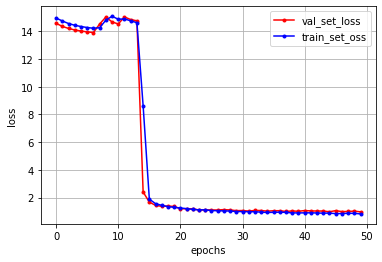

In [5]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [4]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
import math

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
a = categories
image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-10.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()
    i = i[pre_ans]
    b = a[cnt] 
    cnt += 1
    i = math.trunc(i * 100)
    pre_ans_str = categories[pre_ans]
    print('정답이미지 : ', b ) 
    print('예측 이미지 : ', pre_ans_str, '입니다')

정답이미지 :  갈치.PNG
예측 이미지 :  갈치구이 입니다
정답이미지 :  계란찜.PNG
예측 이미지 :  계란찜 입니다
정답이미지 :  고사리.PNG
예측 이미지 :  고사리나물 입니다
정답이미지 :  메추리.PNG
예측 이미지 :  메추리알장조림 입니다
정답이미지 :  애호박.PNG
예측 이미지 :  애호박볶음 입니다
정답이미지 :  연근4.PNG
예측 이미지 :  오징어채볶음 입니다
정답이미지 :  오징어.PNG
예측 이미지 :  오징어채볶음 입니다
정답이미지 :  제육.PNG
예측 이미지 :  제육볶음 입니다
정답이미지 :  콩자반.PNG
예측 이미지 :  콩자반 입니다


In [6]:
categories

['갈치구이',
 '감자채볶음',
 '계란찜',
 '고사리나물',
 '메추리알장조림',
 '소세지볶음',
 '애호박볶음',
 '연근조림',
 '오징어채볶음',
 '제육볶음',
 '콩자반']

In [8]:
# ------------------------------------- 추가  1 
import keras
from keras import layers
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization 
from keras.layers.normalization import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal')) 
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-10-1.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [9]:
# 추가 -------------------------------1
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 4013 samples, validate on 1338 samples
Epoch 1/50
4013/4013 [==============================] - 19s 5ms/step - loss: 3.0723 - accuracy: 0.4902 - val_loss: 6.7087 - val_accuracy: 0.1143

Epoch 00001: val_loss improved from inf to 6.70873, saving model to ./test/food-10-1.model
Epoch 2/50
4013/4013 [==============================] - 16s 4ms/step - loss: 2.6024 - accuracy: 0.6481 - val_loss: 5.1626 - val_accuracy: 0.2205

Epoch 00002: val_loss improved from 6.70873 to 5.16262, saving model to ./test/food-10-1.model
Epoch 3/50
4013/4013 [==============================] - 16s 4ms/step - loss: 2.3640 - accuracy: 0.7035 - val_loss: 4.3719 - val_accuracy: 0.2384

Epoch 00003: val_loss improved from 5.16262 to 4.37192, saving model to ./test/food-10-1.model
Epoch 4/50
4013/4013 [==============================] - 16s 4ms/step - loss: 2.1561 - accuracy: 0.7473 - val_loss: 3.5088 - val_accuracy: 0.3632

Epoch 00004: val_loss improved from 4.3

In [5]:
#---------------------추가 2
import keras
from keras.layers import ELU
from keras.layers import BatchNormalization , LeakyReLU , Activation
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-10-relu.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
# 추가 -------------------------------2
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Train on 4013 samples, validate on 1338 samples
Epoch 1/100
4013/4013 [==============================] - 11s 3ms/step - loss: 0.7018 - accuracy: 0.9021 - val_loss: 1.1247 - val_accuracy: 0.7616

Epoch 00001: val_loss did not improve from 0.99465
Epoch 2/100
4013/4013 [==============================] - 11s 3ms/step - loss: 0.6980 - accuracy: 0.9021 - val_loss: 1.0899 - val_accuracy: 0.7780

Epoch 00002: val_loss did not improve from 0.99465
Epoch 3/100
4013/4013 [==============================] - 11s 3ms/step - loss: 0.7035 - accuracy: 0.8948 - val_loss: 1.0258 - val_accuracy: 0.7945

Epoch 00003: val_loss did not improve from 0.99465
Epoch 4/100
4013/4013 [==============================] - 11s 3ms/step - loss: 0.7200 - accuracy: 0.8983 - val_loss: 1.0293 - val_accuracy: 0.8072

Epoch 00004: val_loss did not improve from 0.99465
Epoch 5/100
4013/4013 [==============================] - 11s 3ms/step - loss: 0.6867 - accuracy: 0.9043 - val_loss: 1.0556 - val_accuracy: 0.7840

Epoch 00005: 

In [10]:
# ------------------------------------- 추가  위에 relu 사용 
import keras
from keras import layers
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization  ,Activation
from keras.layers.normalization import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal')) 
    model.add(BatchNormalization() )
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-10-2.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [11]:
# 추가 -------------------------------2
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Train on 4013 samples, validate on 1338 samples
Epoch 1/100
4013/4013 [==============================] - 17s 4ms/step - loss: 14.5266 - accuracy: 0.1747 - val_loss: 15.3171 - val_accuracy: 0.1271

Epoch 00001: val_loss improved from inf to 15.31707, saving model to ./test/food-10-2.model
Epoch 2/100
4013/4013 [==============================] - 16s 4ms/step - loss: 13.3933 - accuracy: 0.2462 - val_loss: 14.2304 - val_accuracy: 0.1951

Epoch 00002: val_loss improved from 15.31707 to 14.23042, saving model to ./test/food-10-2.model
Epoch 3/100
4013/4013 [==============================] - 16s 4ms/step - loss: 12.4278 - accuracy: 0.3028 - val_loss: 12.1132 - val_accuracy: 0.3191

Epoch 00003: val_loss improved from 14.23042 to 12.11319, saving model to ./test/food-10-2.model
Epoch 4/100
4013/4013 [==============================] - 17s 4ms/step - loss: 12.0100 - accuracy: 0.3177 - val_loss: 10.9467 - val_accuracy: 0.3774

Epoch 00004: val_loss improved from 12.11319 to 10.94670, saving model


Epoch 00037: val_loss did not improve from 0.97115
Epoch 38/100
4013/4013 [==============================] - 16s 4ms/step - loss: 1.0185 - accuracy: 0.7441 - val_loss: 1.1889 - val_accuracy: 0.7235

Epoch 00038: val_loss did not improve from 0.97115
Epoch 39/100
4013/4013 [==============================] - 16s 4ms/step - loss: 0.9799 - accuracy: 0.7613 - val_loss: 2.7359 - val_accuracy: 0.4895

Epoch 00039: val_loss did not improve from 0.97115
Epoch 40/100
4013/4013 [==============================] - 20s 5ms/step - loss: 0.9865 - accuracy: 0.7568 - val_loss: 1.0737 - val_accuracy: 0.7429

Epoch 00040: val_loss did not improve from 0.97115
